# Plot with SPOCK

## 1- Phase plot

### 1.1 Effective coverage 

Here we present a function to plot the phase coverage of a given target on a range of periods. The user will have to give:

* Th target name, ex: `target = 'Sp1245-5721'`

* Lower boundary of the period range, `pmin = 0.1`

* upper boundary of the period range, `pmax = 3.1`

<div class="alert alert-info">

**Note:** It can happen hat *SPOCK* does not find light curve for a target so the coverage appears nul when it's not. This bug will be solved shortly.

</div>

INFO:  Please add password.csv file in: /Users/elsaducrot/elsenv/lib/python3.7/site-packages/SPOCK-0.0.1-py3.7.egg/SPOCK/credentials/
INFO:  OK Password file exists
INFO: Downloading target list from STARGATE.


INFO:  Downloading LC of Nemesis-3.01 33632 on Ganymede the 20210511
ERROR:  Can not download LC of Nemesis-3.01 33632 on Ganymede the 20210511
INFO:  Downloading LC of Nemesis-3.01 33632 on Ganymede the 20210627
INFO:  Downloading LC of Nemesis-3 33632 on Io the 20210917
INFO:  Downloading LC of Nemesis-3 33632 on Io the 20210918
INFO:  Downloading LC of Nemesis-3 33632 on Io the 20210921
INFO:  Downloading LC of Nemesis-3 33632 on Ganymede the 20211021
INFO:  Downloading LC of Nemesis-3 33632 on Ganymede the 20211022
INFO:  Downloading LC of Nemesis-3 33632 on Ganymede the 20211023
INFO:  Downloading LC of Nemesis-3 33632 on Ganymede the 20211024


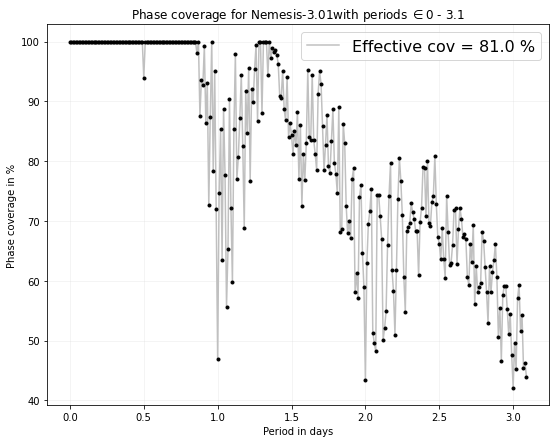

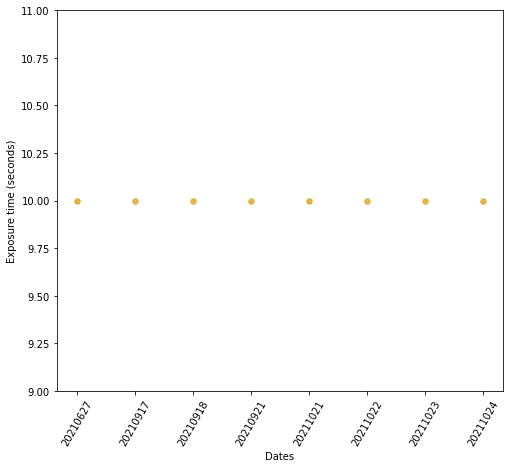

In [1]:
import SPOCK.plots_scheduler as SPOCKplot

SPOCKplot.phase_coverage_given_target(target='Nemesis-3.01',pmin=0,pmax=3.1)
    

### 1.2 Annulus phase plot

First let's download all lighgt  curve for a given target and plot all LCs obtained by the pipeline.

INFO:  Downloading LC of Nemesis-3.01 33632 on Ganymede the 20210511
ERROR:  Can not download LC of Nemesis-3.01 33632 on Ganymede the 20210511
INFO:  Downloading LC of Nemesis-3.01 33632 on Ganymede the 20210627
INFO:  Downloading LC of Nemesis-3 33632 on Io the 20210917
INFO:  Downloading LC of Nemesis-3 33632 on Io the 20210918
INFO:  Downloading LC of Nemesis-3 33632 on Io the 20210921
INFO:  Downloading LC of Nemesis-3 33632 on Ganymede the 20211021
INFO:  Downloading LC of Nemesis-3 33632 on Ganymede the 20211022
INFO:  Downloading LC of Nemesis-3 33632 on Ganymede the 20211023
INFO:  Downloading LC of Nemesis-3 33632 on Ganymede the 20211024


(0.98, 1.02)

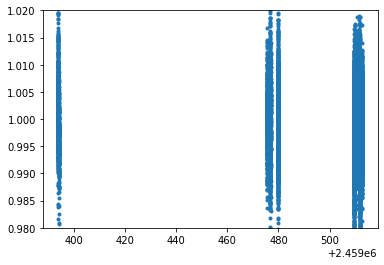

In [2]:
import SPOCK.plots_scheduler as SPOCKplot
import matplotlib.pyplot as plt

t, diff_flux, exposures, dates, target_name, times = SPOCKplot.get_all_LCS(
                                                        gaia_id_target = '4920061410401733632')

plt.plot(t,diff_flux,'.',)
plt.ylim(0.98,1.02)

Now, let's fix the reference timing and period of an hypothetical planet and plot a vizualisation plot of the coverage of this period with the current observations.

/Users/elsaducrot/elsenv/lib/python3.7/site-packages/SPOCK-0.0.1-py3.7.egg/SPOCK/plots_scheduler.py:768: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



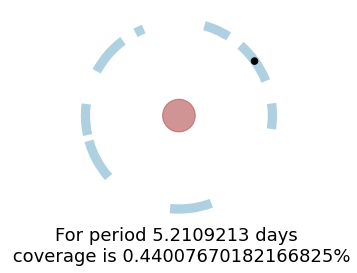

In [3]:
t0 = 2459512.791
period = 5.2109213
SPOCKplot.plot_annulus_phase_covered(times=times, period=period, target_name=target_name,t0=t0)

Finally, you can plot the phase folded LC for a given period to see if a transit shape actually stands out

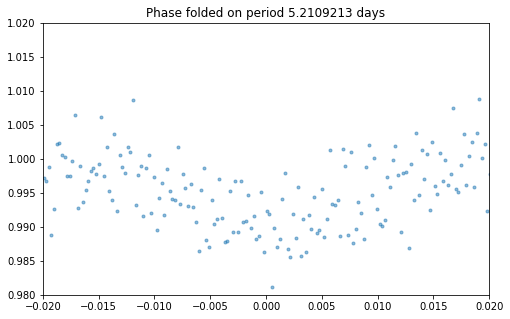

In [4]:
SPOCKplot.phase_folded_LC(t,diff_flux,period,t0,x_lim_phase=0.02)

## 2-  Visibility plot

In a similar way as visibility plot [websites](http://www.not.iac.es/observing/forms/visibility/), *SPOCK* gives the option to plot the visibility of a target over night from all SPECULOOS observatories. The user simply has to enter:

* The name of the site, ex: `name_observatory = 'SSO'`

* The date of the night (start set at 3p.m by default to avoid confusion between sites), ex: `day = Time('2020-10-12 15:00:00')`

* Target name, ex: `target = 'Sp0439-3235'`

Note that this plot does not specify the distance to the moon yet. 

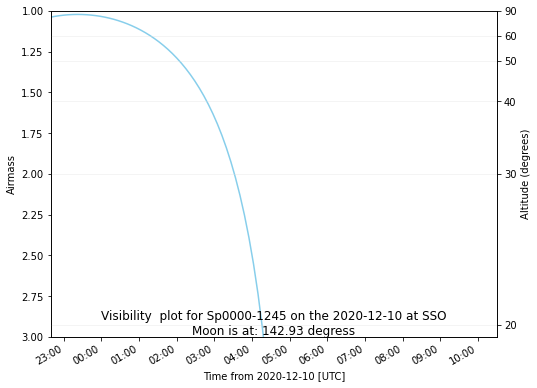

In [5]:
import SPOCK.plots_scheduler as SPOCKplot
from astropy.time import Time

#SPOCKplot.airmass_altitude_plot_given_target(name_observatory='SSO',day=Time('2020-12-10 15:00:00'),
#                                             target='Sp0000-1245')
SPOCKplot.airmass_altitude_plot_given_target(name_observatory="SSO",\
                                                     day=Time('2020-12-10 15:00:00'),\
                                                     target='Sp0000-1245')

## 3- Gant chart of <span style="background-color:lightyellow"><font color='orangered'> **night_blocks** </font></span> 

SPOCKplot gives the possibility to draw a gant chart of all observations on your local database scheduled with *SPOCK* or on a give date range. The plot will be automatic open in another window and is interactive. When passing on a block <span style="background-color:lightyellow"><font color='orangered'> **night_blocks** </font></span> start time, filter and exposure time will be displayed.

### All <span style="background-color:lightyellow"><font color='orangered'> **night_blocks** </font></span>  ever produced

With ``gantt_chart_all()`` the user plots the night blocks from the whole **local** databse (can take up to 30-40 seconds).

In [6]:
import SPOCK.plots_scheduler as SPOCKplot

SPOCKplot.gantt_chart_all()

###  <span style="background-color:lightyellow"><font color='orangered'> **night_blocks** </font></span>  on a specific date range

In this case the user must specify `date_start` and `date_end` in addition to a list of SPECULOOS telescopes.

In [7]:
from astropy.time import Time
import SPOCK.plots_scheduler as SPOCKplot

day = Time('2020-12-10')
SPOCKplot.gantt_chart(date_start=day,date_end=day+1,telescope=['Artemis','Io'])


<img src="../../../_static/css/gantt.png" width="1000" align=center/>